In [ ]:
!pip install opencv-contrib-python

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d jessicali9530/lfw-dataset

100% 112M/112M [00:03<00:00, 25.6MB/s]
100% 112M/112M [00:03<00:00, 30.4MB/s]


In [ ]:
!kaggle datasets download -d ciplab/real-and-fake-face-detection

 99% 425M/431M [00:11<00:00, 58.5MB/s]
100% 431M/431M [00:11<00:00, 39.8MB/s]


In [ ]:
!unzip real-and-fake-face-detection.zip

Archive:  real-and-fake-face-detection.zip
  inflating: real_and_fake_face/training_fake/easy_100_1111.jpg  
  inflating: real_and_fake_face/training_fake/easy_101_0010.jpg  
  inflating: real_and_fake_face/training_fake/easy_102_0101.jpg  
  inflating: real_and_fake_face/training_fake/easy_103_1111.jpg  
  inflating: real_and_fake_face/training_fake/easy_104_1000.jpg  
  inflating: real_and_fake_face/training_fake/easy_105_1100.jpg  
  inflating: real_and_fake_face/training_fake/easy_106_0011.jpg  
  inflating: real_and_fake_face/training_fake/easy_107_1011.jpg  
  inflating: real_and_fake_face/training_fake/easy_108_1111.jpg  
  inflating: real_and_fake_face/training_fake/easy_109_1111.jpg  
  inflating: real_and_fake_face/training_fake/easy_10_0001.jpg  
  inflating: real_and_fake_face/training_fake/easy_110_0001.jpg  
  inflating: real_and_fake_face/training_fake/easy_111_1101.jpg  
  inflating: real_and_fake_face/training_fake/easy_112_1001.jpg  
  inflating: real_and_fake_face/tr

In [ ]:
!unzip lfw-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0022.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0023.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0024.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0025.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0026.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0027.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0028.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0029.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Si

Face Detection using Haar Cascade


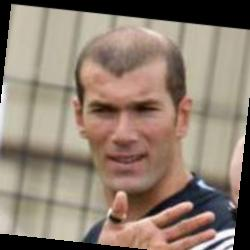

In [ ]:
original = cv2.imread('/content/lfw-deepfunneled/lfw-deepfunneled/Zinedine_Zidane/Zinedine_Zidane_0004.jpg')
cv2_imshow(original)

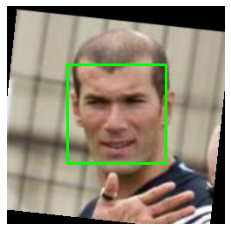

In [ ]:
grayscale_image = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
detected_faces = face_cascade.detectMultiScale(grayscale_image)
for (column, row, width, height) in detected_faces:
  cv2.rectangle(original, (column, row),(column + width, row + height), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Face Detection using HOG

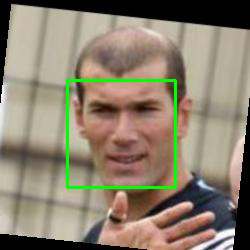

In [ ]:
import dlib
img6 = cv2.imread('/content/lfw-deepfunneled/lfw-deepfunneled/Zinedine_Zidane/Zinedine_Zidane_0004.jpg')
gray = cv2.cvtColor(img6, cv2.COLOR_BGR2GRAY)
hogFaceDetector = dlib.get_frontal_face_detector()
faces = hogFaceDetector(gray, 1)
for (i, rect) in enumerate(faces):
  x = rect.left()
  y = rect.top()
  w = rect.right() - x
  h = rect.bottom() - y
  cv2.rectangle(img6, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv2_imshow(img6)

Image Segmentation

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

(166, 150)


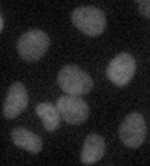

In [ ]:
img1= cv2.imread('tounching_grayscale.png', cv2.IMREAD_GRAYSCALE)
print(img1.shape)
cv2_imshow(img1)

In [ ]:
print(img1)

[[17 24 16 ... 62 67 66]
 [17 18 17 ... 57 60 61]
 [19 12 17 ... 52 53 56]
 ...
 [ 9 13 19 ... 10  7 12]
 [11 10 18 ... 12 12 12]
 [14 15 19 ... 10 10 11]]


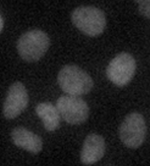

(166, 150, 3)


In [ ]:
original_image = cv2.imread("tounching_grayscale.png")
cv2_imshow(original_image)
print(original_image.shape)

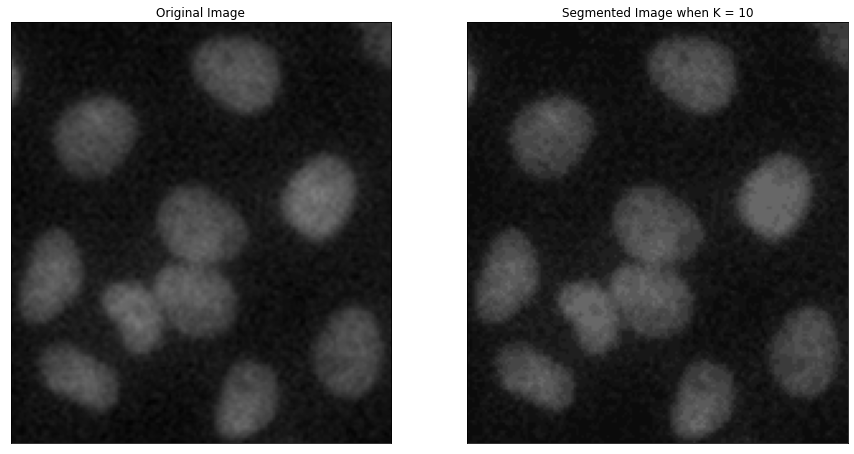

In [ ]:
pixels_vals = original_image.reshape((-1, 3))
pixel_vals = np.float32(pixels_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10 #check at K = 3 and K = 5
attempts = 10
ret, label, center = cv2.kmeans(pixel_vals, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((original_image.shape))
figure_size=15
plt.figure(figsize=(figure_size, figure_size))
plt.subplot(1,2,1), plt.imshow(original_image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(result_image)
plt.title('Segmented Image when K = %i' %K), plt.xticks([]), plt.yticks([])
plt.show()

Obtained threshold:  45.0


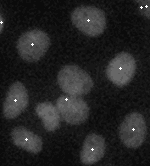

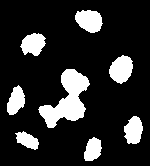

In [ ]:
resultimage1 = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)
original_image1 = cv2.imread("tounching_grayscale.png", cv2.IMREAD_GRAYSCALE)
otsu_threshold, image_result = cv2.threshold(resultimage1, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Obtained threshold: ", otsu_threshold)
contours, hierarchy = cv2.findContours(image_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
  M = cv2.moments(c)
  if M["m00"] != 0:
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
  else:
    cX, cY = 0, 0
  cv2.circle(resultimage1, (cX, cY), 1, (255, 0, 0), -1)
cv2_imshow(resultimage1)
cv2.drawContours(image_result, contours, -1, (0, 255, 0), 3)
cv2_imshow(image_result)

Find and Draw Contours

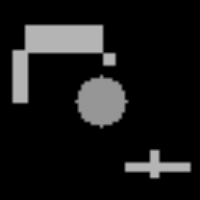

In [ ]:
img = cv2.imread('shapes.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(cv2.resize(img, (200, 200)))

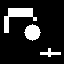

In [ ]:
ret1, thresh = cv2.threshold(img, 0, 255, 0)
cv2_imshow(thresh)

3


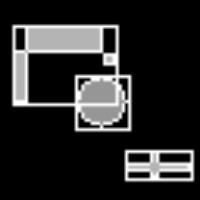

In [ ]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for c in contours:
  x, y, w, h = cv2.boundingRect(c)
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 1)
print(len(contours))
cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
cv2_imshow(cv2.resize(img, (200, 200)))

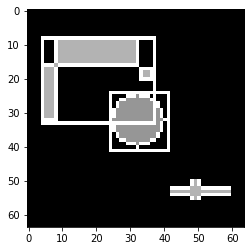

In [ ]:
cnt = contours[0]
M = cv2.moments(cnt)
x,y,w,h = cv2.boundingRect(cnt)
box = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(box, cmap = 'gray')

Image Classification


In [ ]:
from skimage import feature
import glob
images = []
labels = []
path = "/content/real_and_fake_face/training_real/*.*"
for file in glob.glob(path):
  img6 = cv2.imread(file)
  img6 = cv2.resize(img6, (128, 256))
  hog_desc = feature.hog(img6, orientations=9, pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2), 
                         transform_sqrt=True, block_norm='L2-Hys')
  images.append(hog_desc)
  labels.append(1)
# print(labels)

In [ ]:
path = "/content/real_and_fake_face/training_fake/*.*"
for file in glob.glob(path):
  img = cv2.imread(file)
  img = cv2.resize(img, (128, 256))
  hog_desc = feature.hog(img, orientations=9, pixels_per_cell=(8, 8), 
                        cells_per_block=(2,2), transform_sqrt=True,
                         block_norm='L2-Hys')
  images.append(hog_desc)
  labels.append(0)

In [ ]:
# print(len(images))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, 
                                                    test_size=0.25, random_state=42)

In [ ]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC(random_state = 42, tol=1e-5)
clf = svm_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
predictions = svm_model.predict(X_test)
print(accuracy_score(y_test, predictions)*100)

54.40313111545988


Corner Detection on Taj Mahal using Harris Corner Detector

In [ ]:
imga = cv2.imread('image1.jpeg')
imgb= cv2.imread('image2.jpeg')
def doHarris(img):
  grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  grayscale = np.float32(grayscale)
  dst = cv2.cornerHarris(grayscale, 2, 3, 0.04)
  dst = cv2.dilate(dst, None)
  img[dst>0.01*dst.max()] = [0,0,255]
  return img

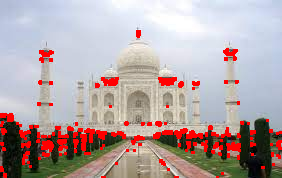

In [ ]:
cv2_imshow(doHarris(imga))

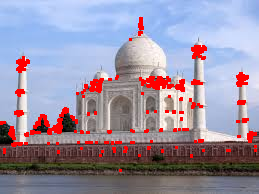

In [ ]:
cv2_imshow(doHarris(imgb))

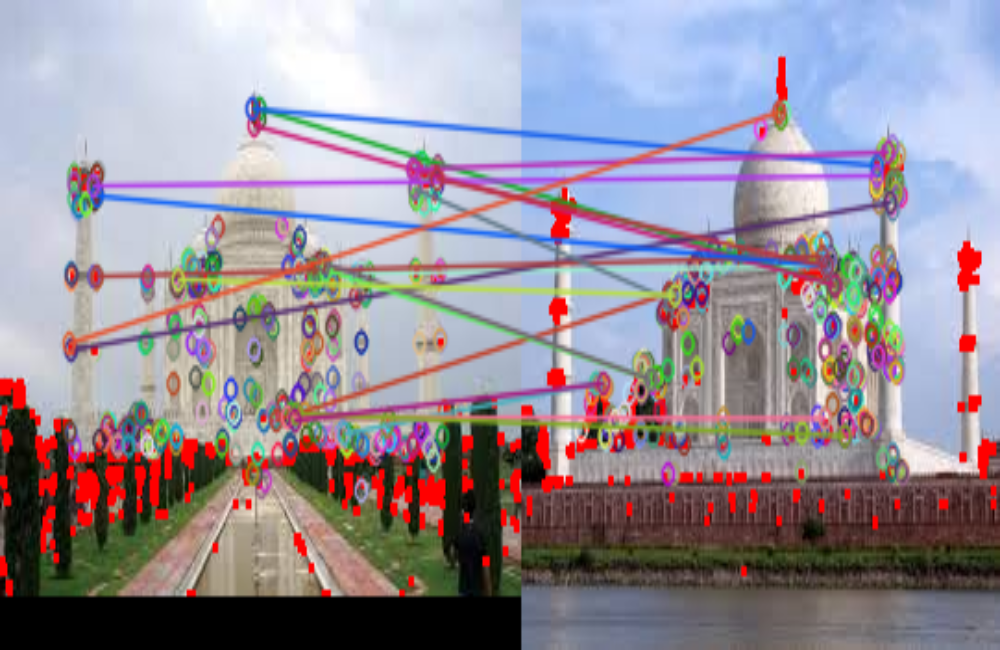

In [ ]:
query_img_bw = cv2.cvtColor(imga, cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(imgb, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create()
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw, None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw, None)
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors, trainDescriptors)
final_img = cv2.drawMatches(imga, queryKeypoints, imgb, trainKeypoints, matches[:20], None)
final_img = cv2.resize(final_img, (1000, 650))
cv2_imshow(final_img)

Question **7**

In [ ]:
from tensorflow.keras.datasets import mnist
(trainX, trainy), (testX, testy) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def hog_detect(img32):
  
  img21 = cv2.resize(img32, (128, 256))
  hog_desc = feature.hog(img21, orientations=9, pixels_per_cell=(8,8),
                         cells_per_block=(2, 2), transform_sqrt=True,
                         block_norm='L2-Hys')
  return hog_desc
imagestrain = []
for i in range(200):
  img = trainX[i]
  imagestrain.append(hog_detect(img))
# imagestrain

In [ ]:
imagestest = []
for i in range(200):
  img = testX[i]
  imagestest.append(hog_detect(img))
# imagestest

In [ ]:
labelstrain = trainy[:200]
labelstest = testy[:200]
# labelstest
# labelstrain

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'poly', decision_function_shape='ovo', C=1, 
                random_state = 42, tol=1e-5)
clf = svm_model.fit(imagestrain, labelstrain)

In [ ]:
from sklearn.metrics import accuracy_score
predictions = svm_model.predict(imagestest)
print(accuracy_score(labelstest, predictions)*100)

63.0


In [ ]:
# predictions

Question **9**

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [ ]:
# from keras.preprocessing.image import img_to_array
# import keras_resnet.models

In [ ]:
xtrain = np.expand_dims(xtrain, axis=-1)
xtrain = np.repeat(xtrain, 3, axis=-1)
xtrain = xtrain.astype('float32') / 255
xtrain = tf.image.resize(xtrain, [32, 32])

In [ ]:
xtest = np.expand_dims(xtest, axis=-1)
xtest = np.repeat(xtest, 3,axis=-1)
xtest = xtest.astype('float32') / 255
xtest = tf.image.resize(xtest, [32, 32])

In [ ]:
ytrain = tf.keras.utils.to_categorical(ytrain, num_classes=10)
ytest = tf.keras.utils.to_categorical(ytest, num_classes=10)

In [ ]:
# ytrain.shape

In [ ]:
IMG_SIZE = 32

In [ ]:
# tf.__version__

In [ ]:
from keras.models import Sequential
from tensorflow.keras.applications import VGG19
from keras.layers import Dense, Flatten

In [ ]:
vgg19 = VGG19(weights = 'imagenet', include_top = False,
              input_shape=(IMG_SIZE, IMG_SIZE, 3))
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer = 'sgd',
              metrics=['accuracy'])
model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 20,029,514
Trainable params: 20,029,514
Non-trainable params: 0
_________________________________________________________________


In [ ]:
xtrain = xtrain[:1000]
xtest = xtest[:1000]
ytrain = ytrain[:1000]
ytest = ytest[:1000]

In [ ]:
# xtrain[0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xtrain.numpy(), ytrain, 
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 32, 32, 3)
(250, 32, 32, 3)
(750, 10)
(250, 10)


In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    batch_size=128, 
                    validation_data=(x_test, y_test))

Epoch 1/10
6/6 [==============================] - 107s 17s/step - loss: 0.1147 - accuracy: 0.9667 - val_loss: 0.1554 - val_accuracy: 0.9640
Epoch 2/10
6/6 [==============================] - 98s 16s/step - loss: 0.0887 - accuracy: 0.9733 - val_loss: 0.1996 - val_accuracy: 0.9480
Epoch 3/10
6/6 [==============================] - 95s 16s/step - loss: 1.0140 - accuracy: 0.7093 - val_loss: 1.1267 - val_accuracy: 0.6440
Epoch 4/10
6/6 [==============================] - 108s 19s/step - loss: 0.5606 - accuracy: 0.8493 - val_loss: 0.3688 - val_accuracy: 0.9200
Epoch 5/10
6/6 [==============================] - 92s 15s/step - loss: 0.1745 - accuracy: 0.9573 - val_loss: 0.1733 - val_accuracy: 0.9720
Epoch 6/10
6/6 [==============================] - 93s 15s/step - loss: 0.0795 - accuracy: 0.9747 - val_loss: 0.1623 - val_accuracy: 0.9640
Epoch 7/10
6/6 [==============================] - 89s 15s/step - loss: 0.0495 - accuracy: 0.9840 - val_loss: 0.1349 - val_accuracy: 0.9720
Epoch 8/10
6/6 [=========

In [ ]:
preds = model.predict(xtest, batch_size=128)

In [ ]:
from sklearn.metrics import confusion_matrix
# confusion_matrix(ytest, preds)
preds = np.argmax(preds, axis=1)
ytest = np.argmax(ytest, axis=1)
cm = confusion_matrix(ytest, preds)
print(cm)

[[ 83   0   1   0   0   0   1   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  2   2 107   2   1   0   0   2   0   0]
 [  0   0   0 106   0   1   0   0   0   0]
 [  0   0   1   0 106   0   0   3   0   0]
 [  0   1   0   1   0  85   0   0   0   0]
 [  0   0   1   0   0   0  86   0   0   0]
 [  0   1   0   0   1   0   0  96   0   1]
 [  0   0   4   0   0   0   2   0  81   2]
 [  0   0   1   0   3   0   0   3   2  85]]


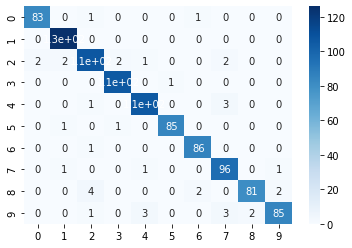

<Figure size 1200x1200 with 0 Axes>

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure
ax = sns.heatmap(cm, annot=True, cmap='Blues')
figure(figsize=(15, 15), dpi=80)
plt.show()

**Question 4 (Coding Session 2)**

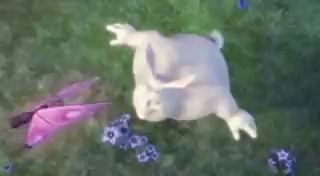

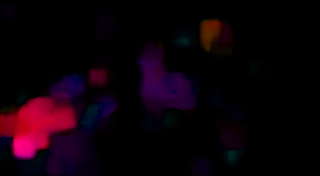

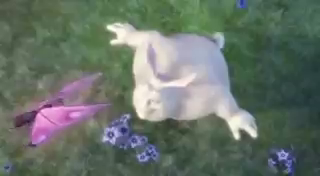

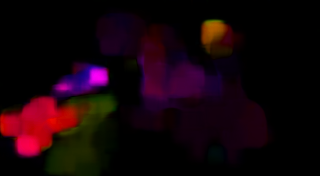

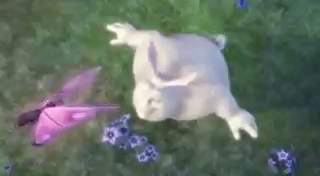

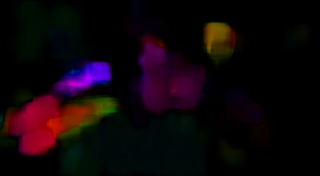

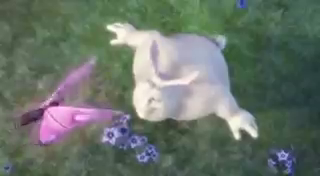

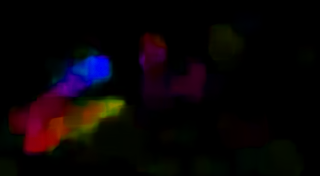

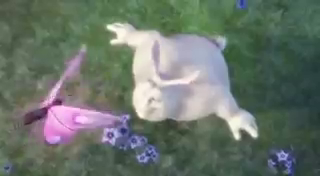

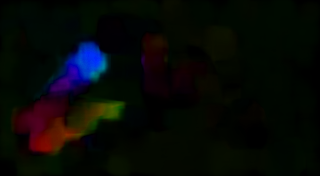

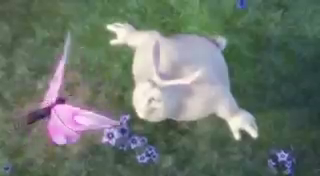

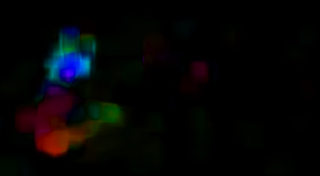

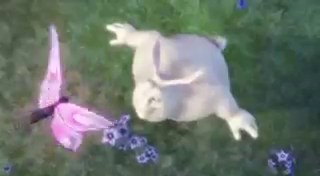

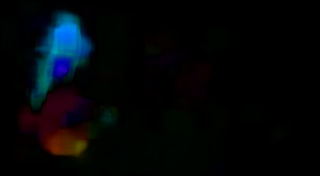

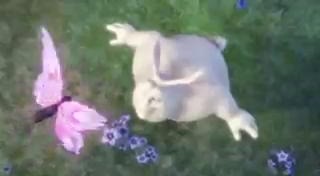

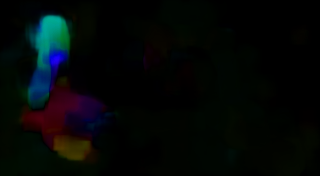

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow  as cv_imshow
  
# The video feed is read in as
# a VideoCapture object
cap = cv.VideoCapture("videoplayback.mp4")
  
# ret = a boolean return value from
# getting the frame, first_frame = the
# first frame in the entire video sequence
ret, first_frame = cap.read()
  
# Converts frame to grayscale because we
# only need the luminance channel for
# detecting edges - less computationally 
# expensive
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
  
# Creates an image filled with zero
# intensities with the same dimensions 
# as the frame
mask = np.zeros_like(first_frame)
  
# Sets image saturation to maximum
mask[..., 1] = 255
  
for j in range(0,8):
      
    # ret = a boolean return value from getting
    # the frame, frame = the current frame being
    # projected in the video
    ret, frame = cap.read()
      
    # Opens a new window and displays the input
    # frame
    cv_imshow(frame)
      
    # Converts each frame to grayscale - we previously 
    # only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
      
    # Calculates dense optical flow by Farneback method
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray, 
                                       None,
                                       0.5, 3, 15, 3, 5, 1.2, 0)
      
    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
      
    # Sets image hue according to the optical flow 
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
      
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
      
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
      
    # Opens a new window and displays the output frame
    cv_imshow(rgb)
      
    # Updates previous frame
    prev_gray = gray
      
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
  
# The following frees up resources and
# closes all windows
cap.release()
cv.destroyAllWindows()

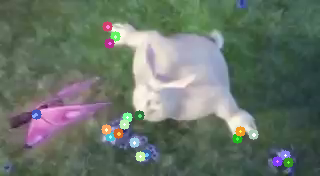

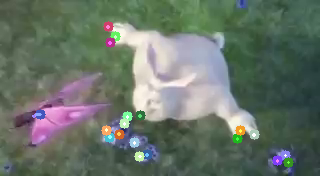

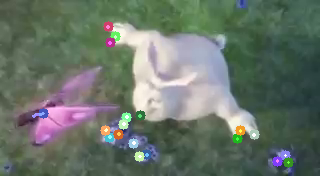

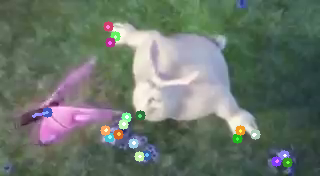

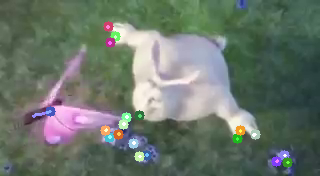

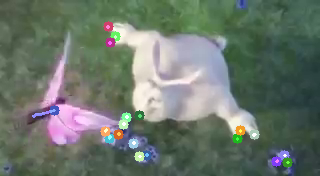

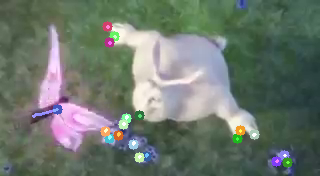

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
  
cap = cv2.VideoCapture('videoplayback.mp4')
  
# params for corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
  
# Parameters for lucas kanade optical flow
lk_params = dict( winSize = (15, 15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                              10, 0.03))
  
# Create some random colors
color = np.random.randint(0, 255, (100, 3))
  
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame,
                        cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None,
                             **feature_params)
  
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
  
for i in range(0,7):
      
    ret, frame = cap.read()
    frame_gray = cv2.cvtColor(frame,
                              cv2.COLOR_BGR2GRAY)
  
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray,
                                           frame_gray,
                                           p0, None,
                                           **lk_params)
  
    # Select good points
    good_new = p1[st == 1]
    good_old = p0[st == 1]
  
    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, 
                                       good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (a, b), (c, d),color[i].tolist(), 2)
          
        frame = cv2.circle(frame, (a, b), 5,
                           color[i].tolist(), -1)
          
    img = cv2.add(frame, mask)
  
    cv2_imshow(img)
      
    k = cv2.waitKey(25)
    if k == 27:
        break
  
    # Updating Previous frame and points 
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
  
cv2.destroyAllWindows()
cap.release()

**Question 3 (Coding Session 2)**

In [ ]:
from keras.preprocessing import image
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
model.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
from skimage import feature
import glob
images = []
labels = []
i = 0
path = "/content/real_and_fake_face/training_real/*.*"
for file in glob.glob(path):
  if i<100:
    img = cv2.imread(file)
    img = cv2.resize(img, (224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    vgg16_feature = model.predict(img_data)
    feature_array = np.array(vgg16_feature)
    images.append(feature_array.flatten())
    labels.append(1)
    i = i+1
  if i==100:
    break

In [ ]:
path = '/content/real_and_fake_face/training_fake/*.*'
i = 0
for file in glob.glob(path):
  if i<100:
    img = cv2.imread(file)
    img = cv2.resize(img, (224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    vgg16_feature = model.predict(img_data)
    feature_array = np.array(vgg16_feature)
    images.append(feature_array.flatten())
    labels.append(0)
    i = i + 1
  if i==100:
    break

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.20)

In [ ]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
clf = svm_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
predictions = svm_model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7


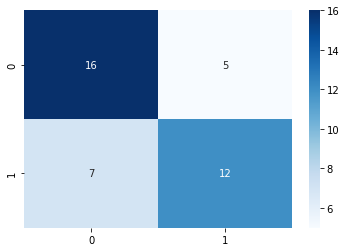

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predictions)
import seaborn as sns
ax = sns.heatmap(cf, annot=True, cmap='Blues')
plt.show()

RANSAC

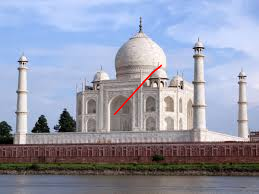

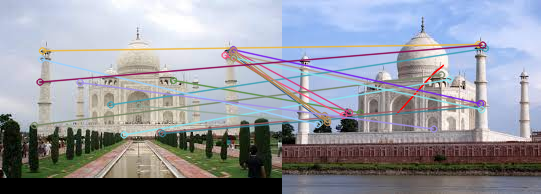

In [ ]:
MIN_MATCH_COUNT = 4
orb = cv2.ORB_create()
img1 = cv2.imread("image1.jpeg")
img2 = cv2.imread("image2.jpeg")

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

kpts1, descs1 = orb.detectAndCompute(gray1, None)
kpts2, descs2 = orb.detectAndCompute(gray2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descs1, descs2)
dmatches = sorted(matches, key = lambda x:x.distance)

src_pts = np.float32([kpts1[m.queryIdx].pt for m in dmatches]).reshape(-1,1,2)
dst_pts = np.float32([kpts2[m.trainIdx].pt for m in dmatches]).reshape(-1,1,2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
h, w = img1.shape[:2]
pts = np.float32([ [0,0], [0,h-1], [w-1,h-1], [w-1,0]]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts, M)

img2 = cv2.polylines(img2, [np.int32(dst)], True, (0,0,255), 1, cv2.LINE_AA)
cv2_imshow(img2)

res = cv2.drawMatches(img1, kpts1, img2, kpts2, dmatches[:20], None, flags=2)

cv2_imshow(res)